In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_csv('../input/train.csv')

In [43]:
train_df.loc[2,'comment_text']

'"\n\n ""Points of interest"" \n\nI removed the ""points of interest"" section you added because it seemed kind of spammy. I know you probably didn\'t mean to disobey the rules, but generally, a point of interest tends to be rather touristy, and quite irrelevant to an area culture. That\'s just my opinion, though.\n\nIf you want to reply, just put your reply here and add {{talkback|Jamiegraham08}} on my talkpage.   "'

In [8]:
train_df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,22256635,"Nonsense? kiss off, geek. what I said is true...",1,0,0,0,0,0
1,27450690,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
2,54037174,"""\n\n """"Points of interest"""" \n\nI removed the...",0,0,0,0,0,0
3,77493077,Asking some his nationality is a Racial offenc...,0,0,0,0,0,0
4,79357270,The reader here is not going by my say so for ...,0,0,0,0,0,0
5,82428052,Fried chickens \n\nIs dat sum fried chickens?,0,0,0,0,0,0
6,87311443,Why can you put English for example on some pl...,0,0,0,0,0,0
7,114749757,Guy Fawkes \n\nim a resident in bridgwater and...,0,0,0,0,0,0
8,138560519,as far as nicknames go this article is embarra...,0,0,0,0,0,0
9,139353149,Woodland Meadows\nGood to hear that you correc...,0,0,0,0,0,0


In [4]:
train_df.shape

(95851, 8)

In [5]:
test_df=pd.read_csv('../input/test.csv')

In [7]:
test_df.head()

,id,comment_text
0,6044863,==Orphaned non-free media (Image:41cD1jboEvL. ...
1,6102620,::Kentuckiana is colloquial. Even though the ...
2,14563293,"Hello fellow Wikipedians,\nI have just modifie..."
3,21086297,"AKC Suspensions \nThe Morning Call - Feb 24, 2..."
4,22982444,== [WIKI_LINK: Talk:Celts] ==


In [24]:
#Toxic , Obscene, Insult are highly correlated

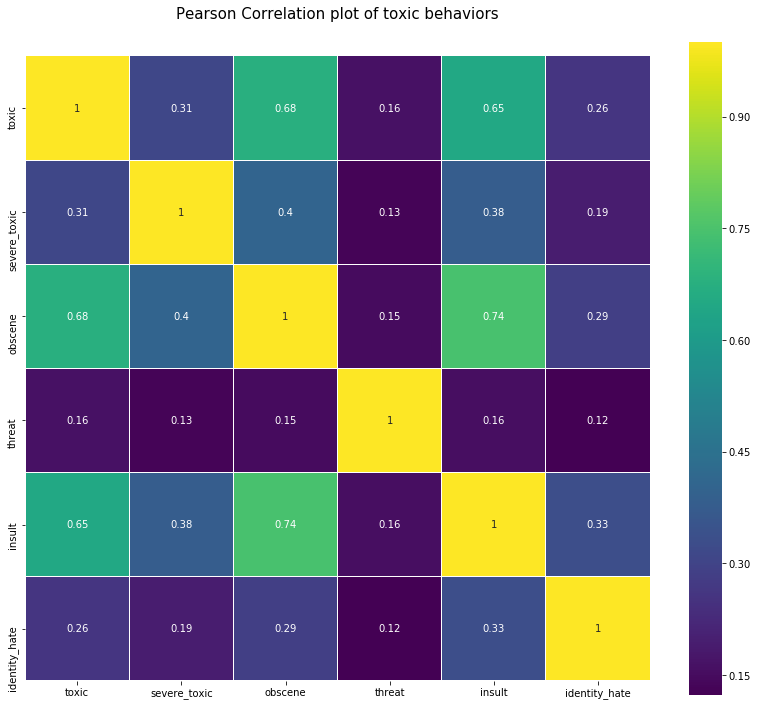

In [25]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation plot of toxic behaviors', y=1.05, size=15)
sns.heatmap(train_df[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].astype(float).corr(),linewidths=0.1,
            vmax=1.0, square=True, cmap=colormap, linecolor='white',
            annot=True)

In [37]:
train_df['toxicity_label']=(train_df==1).any(axis=1)

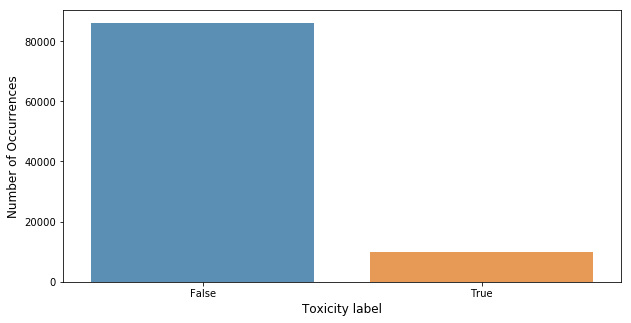

In [38]:
is_toxic = train_df['toxicity_label'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(is_toxic.index, is_toxic.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Toxicity label', fontsize=12)
plt.show()

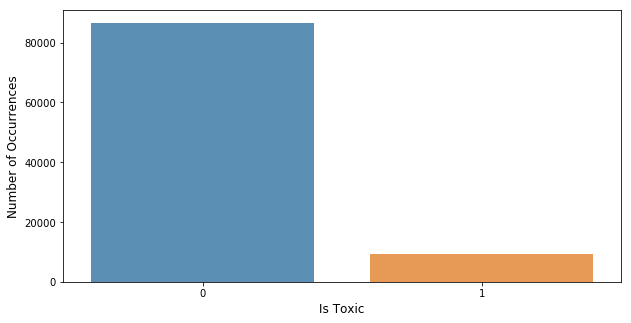

In [12]:
is_toxic = train_df['toxic'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(is_toxic.index, is_toxic.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Toxic', fontsize=12)
plt.show()

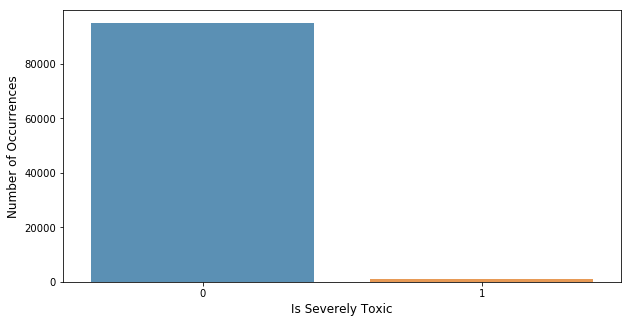

In [27]:
is_severe_toxic = train_df['severe_toxic'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(is_severe_toxic.index, is_severe_toxic.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Severely Toxic', fontsize=12)
plt.show()

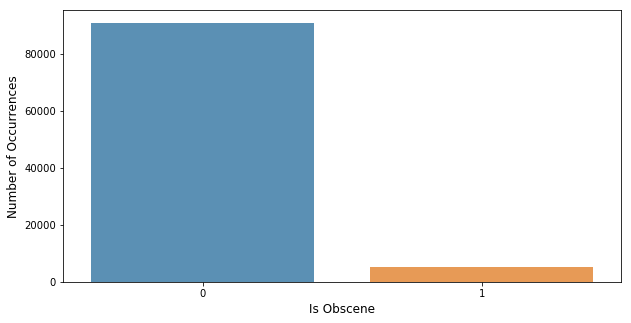

In [28]:
is_obscene = train_df['obscene'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(is_obscene.index, is_obscene.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Obscene', fontsize=12)
plt.show()

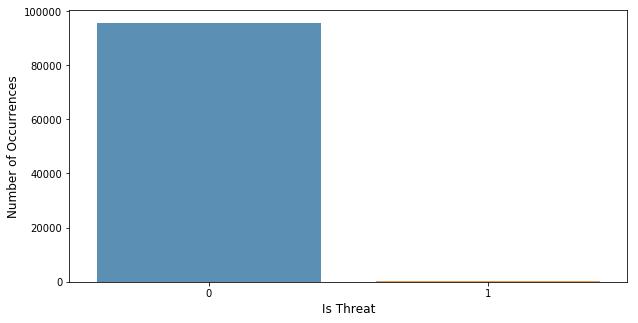

In [29]:
is_threat = train_df['threat'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(is_threat.index, is_threat.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Threat', fontsize=12)
plt.show()

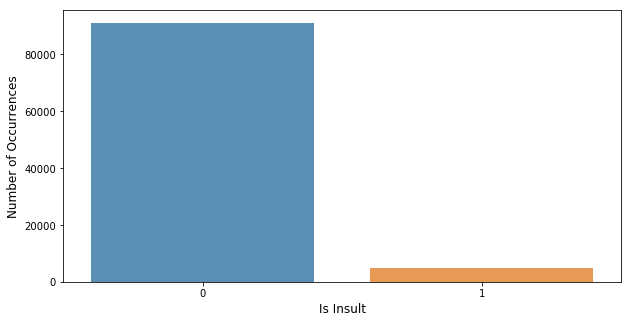

In [30]:
is_insult = train_df['insult'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(is_insult.index, is_insult.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Insult', fontsize=12)
plt.show()

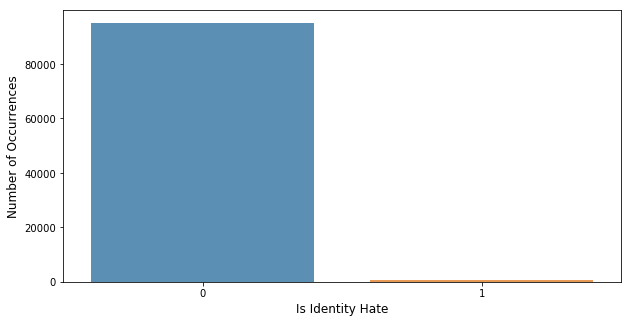

In [31]:
is_identity_hate = train_df['identity_hate'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(is_identity_hate.index, is_identity_hate.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Is Identity Hate', fontsize=12)
plt.show()

**Word Distribution Between Test and Training Sets**

In [39]:
train_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'toxicity_label'],
      dtype='object')

(-0.5, 1439.5, 1079.5, -0.5)

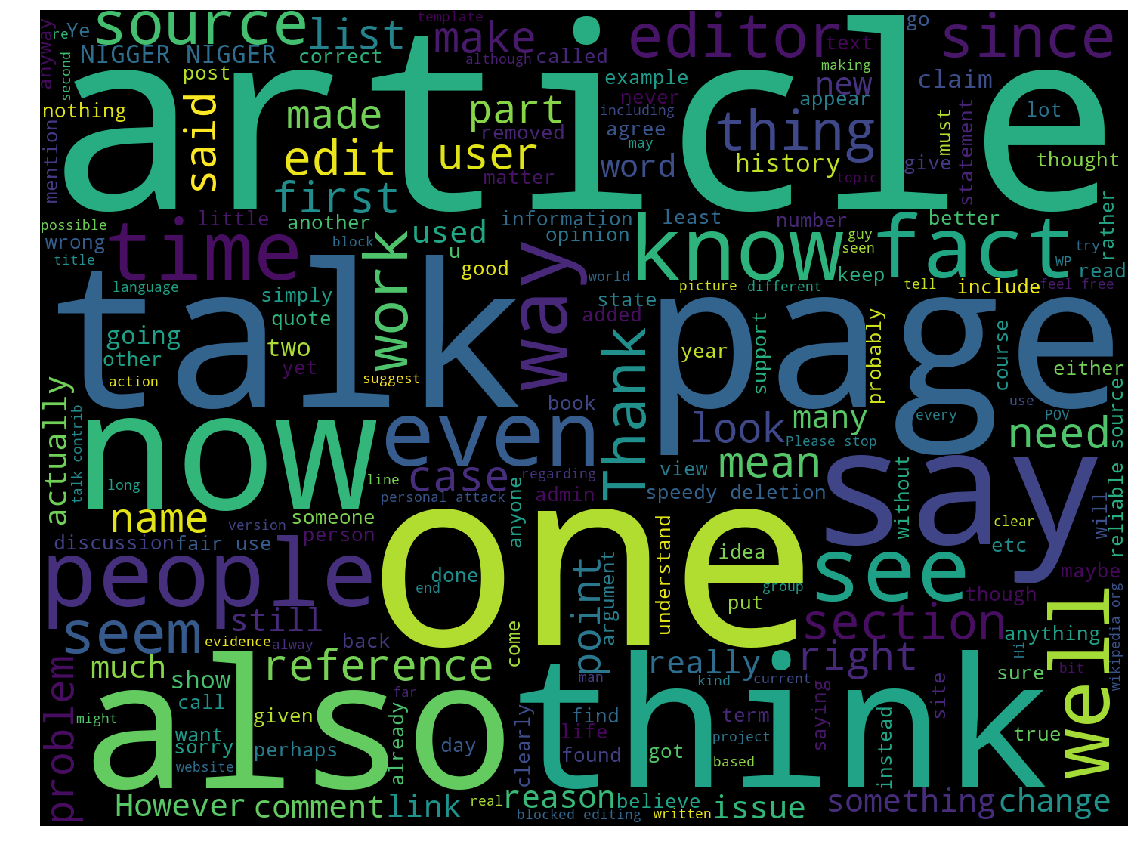

In [41]:
from wordcloud import WordCloud
train_qs = pd.Series(train_df['comment_text'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

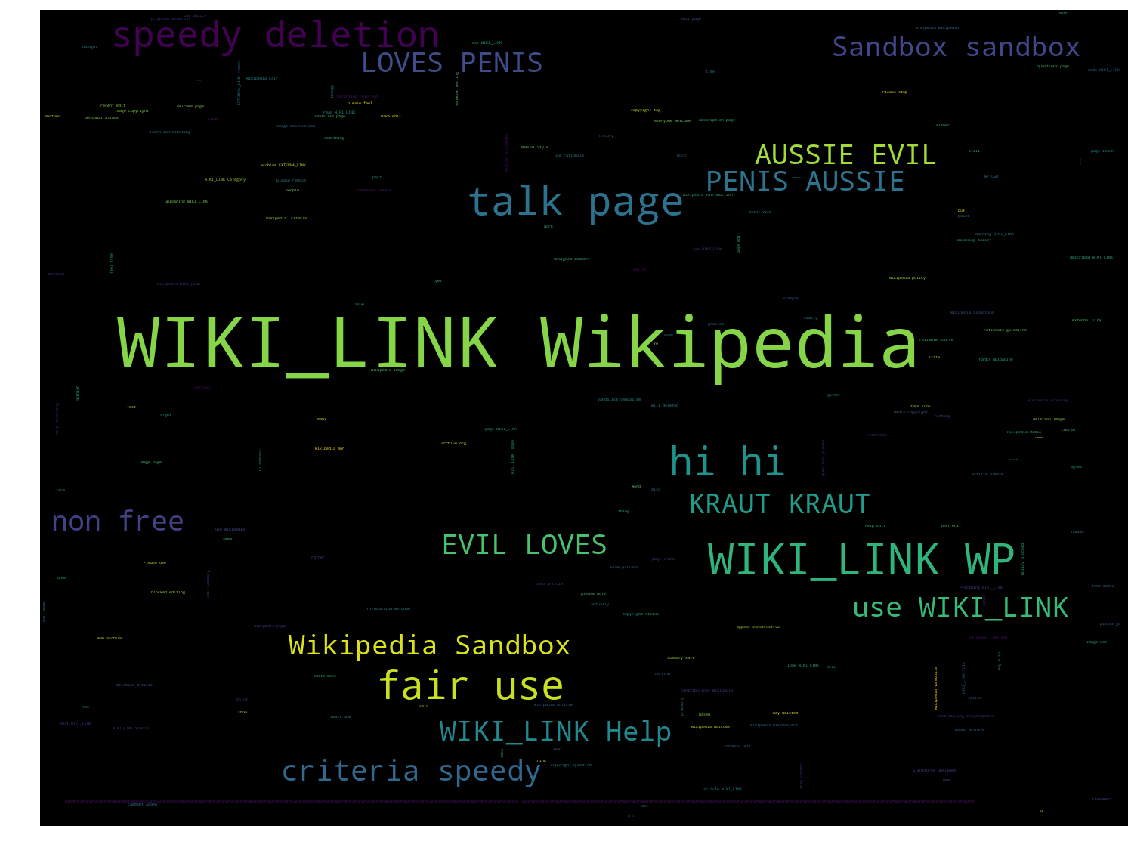

In [42]:
from wordcloud import WordCloud
test_qs = pd.Series(test_df['comment_text'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080).generate(" ".join(test_qs.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [ ]:
train_df==1